<h1>Desafio Final - 3ª Imersão Alura</h1>

Nessa 3ª edição da imersão da Alura, vamos trabalhar com um dataset do ramo de ```Drug Discovery```

# Summary

1. Introdução
2. Importando bibliotecas e datasets
	* Bibliotecas
	* Datasets
3. Entendendo o dataset
	* Verificando o tamanho dos datasets
	* Verificando dados faltantes e tipos de dados
4. Analise Exploratória de Dados
    * Colunas
    * Coluna ‘Tratamento’
    * Coluna ‘Tempo’
    * Coluna ‘Dose’
    * Coluna ‘Composto’
    * Coluna G-0
5. Machine Learning
6. Conclusão
7. Contato
8. Referências

<h2>Introdução</h2>

# 1. Importando bibliotecas e datasets

## 1.1. Bibliotecas

Começaremos fazendo a importação das bibliotecas que utilizaremos nesse projeto.<br>
Vamos começar com algumas bibliotecas básicas e, conforme o andar do projeto, importaremos outras bibliotecas conforme a necessidade.

Começando pela biblioteca Pandas para abrir o dataset, com pandas é possível fazer a leitura de arquivos excel e csv.

In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import Image
from IPython.core.display import display, HTML

#Configurações
sns.set()
%matplotlib inline
display(HTML("<style>.container { width:70% !important; }</style>"))
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
plt.rcParams['figure.figsize'] = [15, 8]

## 1.2. Datasets

Vamos importar nosso dataset que será realizado a análise, onde foi inspirado em um desafio do Laboratory innovation science at Harvard disponibilizando os dados em uma competição no kaggle, de acordo com as informações passadas na página da imersão no site da alura.

https://www.alura.com.br/imersao-dados/aula01-python-pandas-farmacologia?utm_campaign=imersao_dados_3_aulas_aula_1&utm_medium=email&utm_source=RD+Station

In [2]:
df_ex = pd.read_csv('https://github.com/augusto-matos/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true', compression='zip')
df_rt = pd.read_csv('https://github.com/augusto-matos/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true')

# 2. Entendendo o dataset

Nessa seção vamos, estar visualizando o dataset para ter um melhor entendimento da estrutura e das informações que constam no mesmo.

Na seção anterior definimos ```df_ex``` como o nosso dataset de dados experimentos e ```df_rt``` como o dataset dados de resultados. 
<br>Vamos chamar essas variáveis e visualizar somente as primeiras 5 linhas com a função ```.head()```, que como padrão é definido 5 linhas.

In [3]:
df_ex.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50,g-51,g-52,g-53,g-54,g-55,g-56,g-57,g-58,g-59,g-60,g-61,g-62,g-63,g-64,g-65,g-66,g-67,g-68,g-69,g-70,g-71,g-72,g-73,g-74,g-75,g-76,g-77,g-78,g-79,g-80,g-81,g-82,g-83,g-84,g-85,g-86,g-87,g-88,g-89,g-90,g-91,g-92,g-93,g-94,g-95,g-96,g-97,g-98,g-99,g-100,g-101,g-102,g-103,g-104,g-105,g-106,g-107,g-108,g-109,g-110,g-111,g-112,g-113,g-114,g-115,g-116,g-117,g-118,g-119,g-120,g-121,g-122,g-123,g-124,g-125,g-126,g-127,g-128,g-129,g-130,g-131,g-132,g-133,g-134,g-135,g-136,g-137,g-138,g-139,g-140,g-141,g-142,g-143,g-144,g-145,g-146,g-147,g-148,g-149,g-150,g-151,g-152,g-153,g-154,g-155,g-156,g-157,g-158,g-159,g-160,g-161,g-162,g-163,g-164,g-165,g-166,g-167,g-168,g-169,g-170,g-171,g-172,g-173,g-174,g-175,g-176,g-177,g-178,g-179,g-180,g-181,g-182,g-183,g-184,g-185,g-186,g-187,g-188,g-189,g-190,g-191,g-192,g-193,g-194,g-195,g-196,g-197,g-198,g-199,g-200,g-201,g-202,g-203,g-204,g-205,g-206,g-207,g-208,g-209,g-210,g-211,g-212,g-213,g-214,g-215,g-216,g-217,g-218,g-219,g-220,g-221,g-222,g-223,g-224,g-225,g-226,g-227,g-228,g-229,g-230,g-231,g-232,g-233,g-234,g-235,g-236,g-237,g-238,g-239,g-240,g-241,g-242,g-243,g-244,g-245,g-246,g-247,g-248,g-249,g-250,g-251,g-252,g-253,g-254,g-255,g-256,g-257,g-258,g-259,g-260,g-261,g-262,g-263,g-264,g-265,g-266,g-267,g-268,g-269,g-270,g-271,g-272,g-273,g-274,g-275,g-276,g-277,g-278,g-279,g-280,g-281,g-282,g-283,g-284,g-285,g-286,g-287,g-288,g-289,g-290,g-291,g-292,g-293,g-294,g-295,g-296,g-297,g-298,g-299,g-300,g-301,g-302,g-303,g-304,g-305,g-306,g-307,g-308,g-309,g-310,g-311,g-312,g-313,g-314,g-315,g-316,g-317,g-318,g-319,g-320,g-321,g-322,g-323,g-324,g-325,g-326,g-327,g-328,g-329,g-330,g-331,g-332,g-333,g-334,g-335,g-336,g-337,g-338,g-339,g-340,g-341,g-342,g-343,g-344,g-345,g-346,g-347,g-348,g-349,g-350,g-351,g-352,g-353,g-354,g-355,g-356,g-357,g-358,g-359,g-360,g-361,g-362,g-363,g-364,g-365,g-366,g-367,g-368,g-369,g-370,g-371,g-372,g-373,g-374,g-375,g-376,g-377,g-378,g-379,g-380,g-381,g-382,g-383,g-384,g-385,g-386,g-387,g-388,g-389,g-390,g-391,g-392,g-393,g-394,g-395,g-396,g-397,g-398,g-399,g-400,g-401,g-402,g-403,g-404,g-405,g-406,g-407,g-408,g-409,g-410,g-411,g-412,g-413,g-414,g-415,g-416,g-417,g-418,g-419,g-420,g-421,g-422,g-423,g-424,g-425,g-426,g-427,g-428,g-429,g-430,g-431,g-432,g-433,g-434,g-435,g-436,g-437,g-438,g-439,g-440,g-441,g-442,g-443,g-444,g-445,g-446,g-447,g-448,g-449,g-450,g-451,g-452,g-453,g-454,g-455,g-456,g-457,g-458,g-459,g-460,g-461,g-462,g-463,g-464,g-465,g-466,g-467,g-468,g-469,g-470,g-471,g-472,g-473,g-474,g-475,g-476,g-477,g-478,g-479,g-480,g-481,g-482,g-483,g-484,g-485,g-486,g-487,g-488,g-489,g-490,g-491,g-492,g-493,g-494,g-495,g-496,g-497,g-498,g-499,g-500,g-501,g-502,g-503,g-504,g-505,g-506,g-507,g-508,g-509,g-510,g-511,g-512,g-513,g-514,g-515,g-516,g-517,g-518,g-519,g-520,g-521,g-522,g-523,g-524,g-525,g-526,g-527,g-528,g-529,g-530,g-531,g-532,g-533,g-534,g-535,g-536,g-537,g-538,g-539,g-540,g-541,g-542,g-543,g-544,g-545,g-546,g-547,g-548,g-549,g-550,g-551,g-552,g-553,g-554,g-555,g-556,g-557,g-558,g-559,g-560,g-561,g-562,g-563,g-564,g-565,g-566,g-567,g-568,g-569,g-570,g-571,g-572,g-573,g-574,g-575,g-576,g-577,g-578,g-579,g-580,g-581,g-582,g-583,g-584,g-585,g-586,g-587,g-588,g-589,g-590,g-591,g-592,g-593,g-594,g-595,g-596,g-597,g-598,g-599,g-600,g-601,g-602,g-603,g-604,g-605,g-606,g-607,g-608,g-609,g-610,g-611,g-612,g-613,g-614,g-615,g-616,g-617,g-618,g-619,g-620,g-621,g-622,g-623,g-624,g-625,g-626,g-627,g-628,g-629,g-630,g-631,g-632,g-633,g-634,g-635,g-636,g-637,g-638,g-639,g-640,g-641,g-642,g-643,g-644,g-645,g-646,g-647,g-648,g-649,g-650,g-651,g-652,g-653,g-654,g-655,g-656,g-657,g-658,g-659,g-660,g-661,g-662,g-663,g-664,g-665,g-666,g-667,g-668,g-669,g-670,g-671,g-672,g-673,g-674,g-675,g-676,g-677,g-678,g-67

In [4]:
df_rt.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,autotaxin_inhibitor,bacterial_30s_ribosomal_subunit_inhibitor,bacterial_50s_ribosomal_subunit_inhibitor,bacterial_antifolate,bacterial_cell_wall_synthesis_inhibitor,bacterial_dna_gyrase_inhibitor,bacterial_dna_inhibitor,bacterial_membrane_integrity_inhibitor,bcl_inhibitor,bcr-abl_inhibitor,benzodiazepine_receptor_agonist,beta_amyloid_inhibitor,bromodomain_inhibitor,btk_inhibitor,calcineurin_inhibitor,calcium_channel_blocker,cannabinoid_receptor_agonist,cannabinoid_receptor_antagonist,carbonic_anhydrase_inhibitor,casein_kinase_inhibitor,caspase_activator,catechol_o_methyltransferase_inhibitor,cc_chemokine_receptor_antagonist,cck_receptor_antagonist,cdk_inhibitor,chelating_agent,chk_inhibitor,chloride_channel_blocker,cholesterol_inhibitor,cholinergic_receptor_antagonist,coagulation_factor_inhibitor,corticosteroid_agonist,cyclooxygenase_inhibitor,cytochrome_p450_inhibitor,dihydrofolate_reductase_inhibitor,dipeptidyl_peptidase_inhibitor,diuretic,dna_alkylating_agent,dna_inhibitor,dopamine_receptor_agonist,dopamine_receptor_antagonist,egfr_inhibitor,elastase_inhibitor,erbb2_inhibitor,estrogen_receptor_agonist,estrogen_receptor_antagonist,faah_inhibitor,farnesyltransferase_inhibitor,fatty_acid_receptor_agonist,fgfr_inhibitor,flt3_inhibitor,focal_adhesion_kinase_inhibitor,free_radical_scavenger,fungal_squalene_epoxidase_inhibitor,gaba_receptor_agonist,gaba_receptor_antagonist,gamma_secretase_inhibitor,glucocorticoid_receptor_agonist,glutamate_inhibitor,glutamate_receptor_agonist,glutamate_receptor_antagonist,gonadotropin_receptor_agonist,gsk_inhibitor,hcv_inhibitor,hdac_inhibitor,histamine_receptor_agonist,histamine_receptor_antagonist,histone_lysine_demethylase_inhibitor,histone_lysine_methyltransferase_inhibitor,hiv_inhibitor,hmgcr_inhibitor,hsp_inhibitor,igf-1_inhibitor,ikk_inhibitor,imidazoline_receptor_agonist,immunosuppressant,insulin_secretagogue,insulin_sensitizer,integrin_inhibitor,jak_inhibitor,kit_inhibitor,laxative,leukotriene_inhibitor,leukotriene_receptor_antagonist,lipase_inhibitor,lipoxygenase_inhibitor,lxr_agonist,mdm_inhibitor,mek_inhibitor,membrane_integrity_inhibitor,mineralocorticoid_receptor_antagonist,monoacylglycerol_lipase_inhibitor,monoamine_oxidase_inhibitor,monopolar_spindle_1_kinase_inhibitor,mtor_inhibitor,mucolytic_agent,neuropeptide_receptor_antagonist,nfkb_inhibitor,nicotinic_receptor_agonist,nitric_oxide_donor,nitric_oxide_production_inhibitor,nitric_oxide_synthase_inhibitor,norepinephrine_reuptake_inhibitor,nrf2_activator,opioid_receptor_agonist,opioid_receptor_antagonist,orexin_receptor_antagonist,p38_mapk_inhibitor,p-glycoprotein_inhibitor,parp_inhibitor,pdgfr_inhibitor,pdk_inhibitor,phosphodiesterase_inhibitor,phospholipase_inhibitor,pi3k_inhibitor,pkc_inhibitor,potassium_channel_activator,potassium_channel_antagonist,ppar_receptor_agonist,ppar_receptor_antagonist,progesterone_receptor_agonist,progesterone_receptor_antagonist,prostaglandin_inhibitor,prostanoid_receptor_antagonist,proteasome_inhibitor,protein_kinase_inhibitor,protein_phosphatase_inhibitor,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor

## 2.1. Verificando tamanho dos datasets

Vamos visualizar a estrutura do mesmo com a função ```.shape``` da biblioteca pandas, para vermos a quantidade de linhas e colunas que constam em cada dataset.

In [5]:
print('Dataset: Dados de experimentos\nLinhas:{}, Colunas:{}\n\nDataset: Dados de Resultados\nLinhas:{}, Colunas:{}'.format(df_ex.shape[0], df_ex.shape[1], df_rt.shape[0], df_rt.shape[1]))

Dataset: Dados de experimentos
Linhas:23814, Colunas:877

Dataset: Dados de Resultados
Linhas:23814, Colunas:207


**Conforme podemos observar na célula anterior, no dataset de dados de experimentos, temos o total de 23.814 linhas e 877 colunas.
No dataset de dados de resultados, temos a mesma quantidade de linhas 23.814 e 207 colunas.**

## 2.2. Verificando dados faltantes e tipos de dados

Vamos verificar se temos dados faltantes em ambos datasets, para isso, vamos usar a função ```.isnull()``` juntamente com ```.sum()```.
A função ```.isnull()``` como o próprio nome diz, ele verifica se as células em um dataframe é vazio ou se contém informação, se estiver vazio ele retorna ```False```, caso contrário retorna ```True```. Com o parâmetro ```.sum()``` ele faz a somatória de todos os valores ```True```.

In [6]:
df_ex.isnull().sum().sum()

0

In [7]:
df_rt.isnull().sum().sum()

0

Outra etapa importante, é verificarmos os tipos de dados na qual estamos lidando e também verificar se a biblioteca pandas atribuiu para cada coluna, conforme sua natureza.
<br>Podemos realizar essa verificação de dois modos, utilizando a função ```.info()``` ou também a função ```.dtypes```. Particularmente prefiro utilizar a função ```.info()``` pois essa função nos retorna as informações de forma mais estruturada.

In [8]:
df_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c-99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


Para o dataset de dados experimentais, os tipos de dados estão todos certos, na célula anterior tivemos o seguinte retorno.

- 872 colunas do tipo ```float``` que são dados decimais.
- 1 coluna do tipo ```int``` que são dados inteiros, que seria a coluna ```tempo```.
- 4 colunas do tipo ```object```, que são colunas categóricas, onde há informações textuais, no caso as colunas ```id```, ```tratamento```, ```dose``` e ```droga```.

In [9]:
df_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


Para o dataset de dados de resultados, os tipos de dados estão todos certos, na célula anterior tivemos o seguinte retorno.

- 206 colunas do tipo int que são dados inteiros.
- 1 coluna do tipo object, que é uma coluna categórica, que no caso é ```id```.

Para facilitar na hora de fazer uma analise no dataset, vamos retirar o hifen que contem nas colunas ```G``` com a função ```.str.replace()```.

# 3. Análise Exploratório de Dados

A base de dados que usamos até o momento tem uma variável chamada ```droga```mas entendemos, que essa não é a melhor nomenclatura para representa-la. 
Por isso, vamos usar a função ```map``` da biblioteca Pandas para renomear essa coluna.
É importante destacar que passamos o parâmetro ```inplace = True```, esse parâmetro faz com que os dados sejam modificados no local e o dataframe será atualizado. 
Caso esse parâmetro não seja declarado, o default é ```inplace = False``` e o retorno será uma cópia do objeto e caso você queira, precisa salva-lo com um outro nome.

In [10]:
mapa = {'droga':'composto'}
df_ex.rename(columns=mapa, inplace=True)

Para ajudar em nossa análise, vamos remover o hífen que consta nas colunas ```G``` em nosso dataset.

In [11]:
df_ex.columns = df_ex.columns.str.replace('-','')

In [12]:
df_ex.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,g40,g41,g42,g43,g44,g45,g46,g47,g48,g49,g50,g51,g52,g53,g54,g55,g56,g57,g58,g59,g60,g61,g62,g63,g64,g65,g66,g67,g68,g69,g70,g71,g72,g73,g74,g75,g76,g77,g78,g79,g80,g81,g82,g83,g84,g85,g86,g87,g88,g89,g90,g91,g92,g93,g94,g95,g96,g97,g98,g99,g100,g101,g102,g103,g104,g105,g106,g107,g108,g109,g110,g111,g112,g113,g114,g115,g116,g117,g118,g119,g120,g121,g122,g123,g124,g125,g126,g127,g128,g129,g130,g131,g132,g133,g134,g135,g136,g137,g138,g139,g140,g141,g142,g143,g144,g145,g146,g147,g148,g149,g150,g151,g152,g153,g154,g155,g156,g157,g158,g159,g160,g161,g162,g163,g164,g165,g166,g167,g168,g169,g170,g171,g172,g173,g174,g175,g176,g177,g178,g179,g180,g181,g182,g183,g184,g185,g186,g187,g188,g189,g190,g191,g192,g193,g194,g195,g196,g197,g198,g199,g200,g201,g202,g203,g204,g205,g206,g207,g208,g209,g210,g211,g212,g213,g214,g215,g216,g217,g218,g219,g220,g221,g222,g223,g224,g225,g226,g227,g228,g229,g230,g231,g232,g233,g234,g235,g236,g237,g238,g239,g240,g241,g242,g243,g244,g245,g246,g247,g248,g249,g250,g251,g252,g253,g254,g255,g256,g257,g258,g259,g260,g261,g262,g263,g264,g265,g266,g267,g268,g269,g270,g271,g272,g273,g274,g275,g276,g277,g278,g279,g280,g281,g282,g283,g284,g285,g286,g287,g288,g289,g290,g291,g292,g293,g294,g295,g296,g297,g298,g299,g300,g301,g302,g303,g304,g305,g306,g307,g308,g309,g310,g311,g312,g313,g314,g315,g316,g317,g318,g319,g320,g321,g322,g323,g324,g325,g326,g327,g328,g329,g330,g331,g332,g333,g334,g335,g336,g337,g338,g339,g340,g341,g342,g343,g344,g345,g346,g347,g348,g349,g350,g351,g352,g353,g354,g355,g356,g357,g358,g359,g360,g361,g362,g363,g364,g365,g366,g367,g368,g369,g370,g371,g372,g373,g374,g375,g376,g377,g378,g379,g380,g381,g382,g383,g384,g385,g386,g387,g388,g389,g390,g391,g392,g393,g394,g395,g396,g397,g398,g399,g400,g401,g402,g403,g404,g405,g406,g407,g408,g409,g410,g411,g412,g413,g414,g415,g416,g417,g418,g419,g420,g421,g422,g423,g424,g425,g426,g427,g428,g429,g430,g431,g432,g433,g434,g435,g436,g437,g438,g439,g440,g441,g442,g443,g444,g445,g446,g447,g448,g449,g450,g451,g452,g453,g454,g455,g456,g457,g458,g459,g460,g461,g462,g463,g464,g465,g466,g467,g468,g469,g470,g471,g472,g473,g474,g475,g476,g477,g478,g479,g480,g481,g482,g483,g484,g485,g486,g487,g488,g489,g490,g491,g492,g493,g494,g495,g496,g497,g498,g499,g500,g501,g502,g503,g504,g505,g506,g507,g508,g509,g510,g511,g512,g513,g514,g515,g516,g517,g518,g519,g520,g521,g522,g523,g524,g525,g526,g527,g528,g529,g530,g531,g532,g533,g534,g535,g536,g537,g538,g539,g540,g541,g542,g543,g544,g545,g546,g547,g548,g549,g550,g551,g552,g553,g554,g555,g556,g557,g558,g559,g560,g561,g562,g563,g564,g565,g566,g567,g568,g569,g570,g571,g572,g573,g574,g575,g576,g577,g578,g579,g580,g581,g582,g583,g584,g585,g586,g587,g588,g589,g590,g591,g592,g593,g594,g595,g596,g597,g598,g599,g600,g601,g602,g603,g604,g605,g606,g607,g608,g609,g610,g611,g612,g613,g614,g615,g616,g617,g618,g619,g620,g621,g622,g623,g624,g625,g626,g627,g628,g629,g630,g631,g632,g633,g634,g635,g636,g637,g638,g639,g640,g641,g642,g643,g644,g645,g646,g647,g648,g649,g650,g651,g652,g653,g654,g655,g656,g657,g658,g659,g660,g661,g662,g663,g664,g665,g666,g667,g668,g669,g670,g671,g672,g673,g674,g675,g676,g677,g678,g679,g680,g681,g682,g683,g684,g685,g686,g687,g688,g689,g690,g691,g692,g693,g694,g695,g696,g697,g698,g699,g700,g701,g702,g703,g704,g705,g706,g707,g708,g709,g710,g711,g712,g713,g714,g715,g716,g717,g718,g719,g720,g721,g722,g723,g724,g725,g726,g727,g728,g729,g730,g731,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c

Nessa etapa, vamos começar a fazer uma análise dos nossos datasets para tentar melhor entende-los e também gerar insights para prosseguirmos com um modelo de Machine Learning.<br>
Vamos começar as nossas análises pelo atributo ```tratamento```. Primeiramente gostaria de saber quantos valores unicos temos, para isso, vou utilizar a função ```.unique()```

## 3.1. Variáveis Categoricas

In [13]:
df_ex['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

Conforme resultado apresentado acima, temos duas variáveis, ```com_droga``` e ```com_controle```, quando é realizado um experimento, é de prática registrar as variáveis ```normais```, nesse caso em específico, a variável ```com_controle```, onde não foi realizado nenhuma aplicação de droga, e é registrado a variável ```com_droga```, que no caso, é a variável que demonstra os efeitos, a variação em relação a variável ```com_controle```.
<p>Em estatística, isso é conhecido como experimentação.</p>

Vamos verificar frequência em cada variável que consta ainda no atributo ```tratamento```.

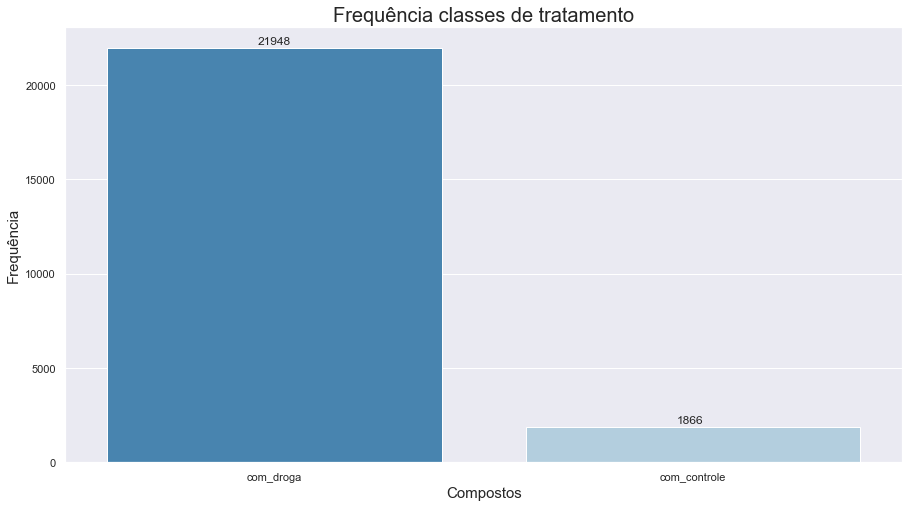

In [18]:
ax = sns.countplot(df_ex['tratamento'], palette='Blues_r')
ax.set_title('Frequência classes de tratamento', fontsize=20)
ax.set_xlabel('Compostos', fontsize=15)
ax.set_ylabel('Frequência', fontsize=15)

for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()), (i.get_x()+0.36, i.get_height()+200), fontsize=12)
plt.show()

A análise realizada acima, nos retorna que, temos o total de 21.948 dados relacionados a variável ```com_droga``` e 1.866 dados relacionados a variável ```com_controle```.

In [19]:
df_ex['tratamento'].value_counts(normalize=True)*100

com_droga       92.164273
com_controle     7.835727
Name: tratamento, dtype: float64

Concluímos na análise da coluna de tratamento que 92% do dataset é em relação a variável ```com_droga```, e os outros 8% é ```com_controle```.

Vamos dar uma olhada na coluna ```tempo```

In [20]:
df_ex['tempo'].unique()

array([24, 72, 48], dtype=int64)

A coluna ```tempo```, é um registro de quanto em quanto tempo é analisado o efeito da droga na cultura de celula, que seria o tempo de esposição. É feito essa coleta em tempos diferentes pois pode acontecer de o efeito da droga não ter surtido efeito em um certo período de tempo, então é realizado em períodos diferentes para verificiar o efeito.

<p>Nesse caso temos analise de 24, 48 e 72 horas.</p>

In [21]:
df_ex['tempo'].value_counts(normalize=True)*100

48    34.643487
72    32.720249
24    32.636264
Name: tempo, dtype: float64

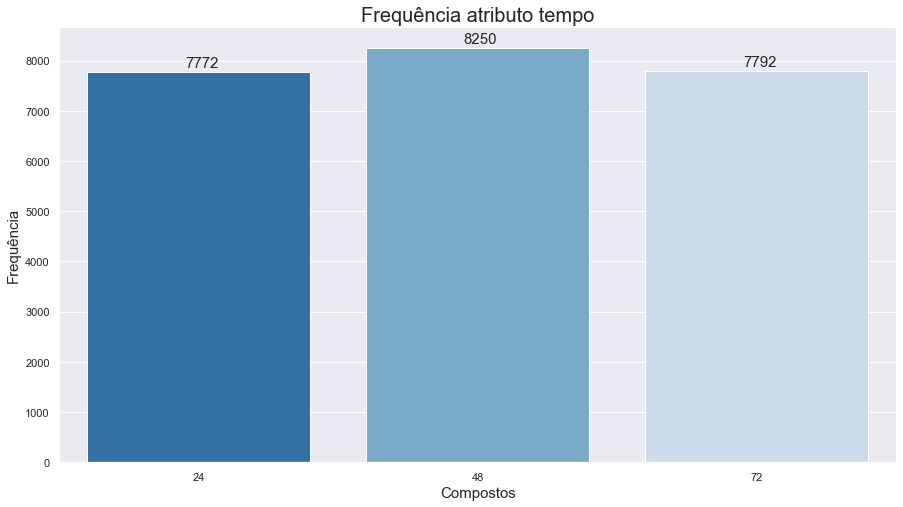

In [22]:
ax1 = sns.countplot(df_ex['tempo'], palette='Blues_r')
ax1.set_title('Frequência atributo tempo', fontsize=20)
ax1.set_xlabel('Compostos', fontsize=15)
ax1.set_ylabel('Frequência', fontsize=15)
for i in ax1.patches:
    ax1.annotate('{}'.format(i.get_height()), (i.get_x()+0.35, i.get_height()+100), fontsize=15)
plt.show()

<p>Analisando o gráfico de barras, podemos concluir temos como maior frequência, a coleta em 48 horas.</p>

Vamos dar uma olhada na coluna ```dose```

In [23]:
df_ex['dose'].unique()

array(['D1', 'D2'], dtype=object)

Na célula anterior, visualizamos os valores únicos da coluna ```Dose```, podemos concluir que foi aplicada em cada cultura de célula, somente duas doses, ```D1``` e ```D2```.

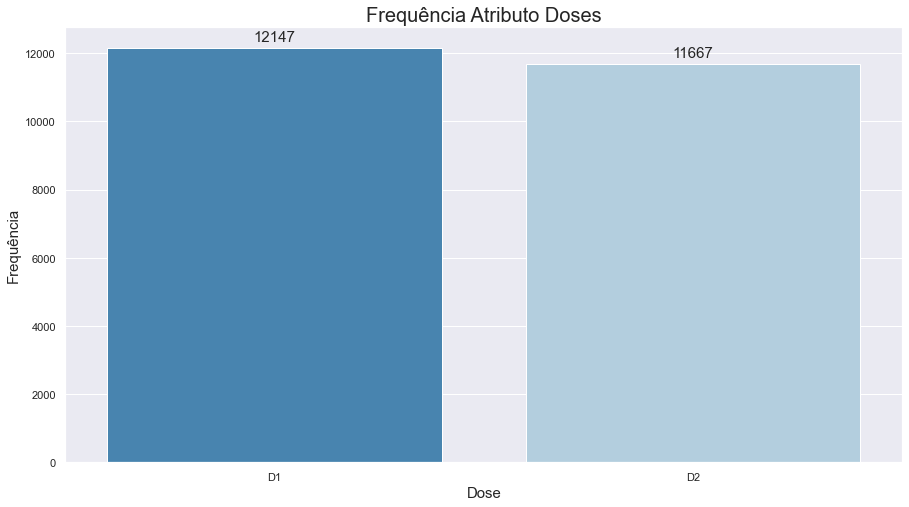

In [24]:
ax2 = sns.countplot(df_ex['dose'], palette='Blues_r')
ax2.set_title('Frequência Atributo Doses', fontsize=20)
ax2.set_xlabel('Dose', fontsize=15)
ax2.set_ylabel('Frequência', fontsize=15)

for i in ax2.patches:
    ax2.annotate('{}'.format(i.get_height()), (i.get_x()+0.35, i.get_height()+200), fontsize=15)
plt.show()

In [25]:
df_ex['dose'].value_counts(normalize=True)*100

D1    51.007811
D2    48.992189
Name: dose, dtype: float64

Pode-se observar que o Atributo ```Dose``` esta com os dados balanceados, temos 51% de doses ```D1``` e 49% de doses aplicadas ```D2```.

Vamos dar uma olhada na coluna ```composto```

In [26]:
df_ex['composto'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

Como já era esperado, de acordo com a primeira visualização que fizemos do dataset, a coluna ```composto``` contém diversos valores, que no caso, é uma identificação de cada droga que foi aplicada.

Vamos visualizar os 5 compostos mais utilizados.

In [27]:
df_ex.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,g40,g41,g42,g43,g44,g45,g46,g47,g48,g49,g50,g51,g52,g53,g54,g55,g56,g57,g58,g59,g60,g61,g62,g63,g64,g65,g66,g67,g68,g69,g70,g71,g72,g73,g74,g75,g76,g77,g78,g79,g80,g81,g82,g83,g84,g85,g86,g87,g88,g89,g90,g91,g92,g93,g94,g95,g96,g97,g98,g99,g100,g101,g102,g103,g104,g105,g106,g107,g108,g109,g110,g111,g112,g113,g114,g115,g116,g117,g118,g119,g120,g121,g122,g123,g124,g125,g126,g127,g128,g129,g130,g131,g132,g133,g134,g135,g136,g137,g138,g139,g140,g141,g142,g143,g144,g145,g146,g147,g148,g149,g150,g151,g152,g153,g154,g155,g156,g157,g158,g159,g160,g161,g162,g163,g164,g165,g166,g167,g168,g169,g170,g171,g172,g173,g174,g175,g176,g177,g178,g179,g180,g181,g182,g183,g184,g185,g186,g187,g188,g189,g190,g191,g192,g193,g194,g195,g196,g197,g198,g199,g200,g201,g202,g203,g204,g205,g206,g207,g208,g209,g210,g211,g212,g213,g214,g215,g216,g217,g218,g219,g220,g221,g222,g223,g224,g225,g226,g227,g228,g229,g230,g231,g232,g233,g234,g235,g236,g237,g238,g239,g240,g241,g242,g243,g244,g245,g246,g247,g248,g249,g250,g251,g252,g253,g254,g255,g256,g257,g258,g259,g260,g261,g262,g263,g264,g265,g266,g267,g268,g269,g270,g271,g272,g273,g274,g275,g276,g277,g278,g279,g280,g281,g282,g283,g284,g285,g286,g287,g288,g289,g290,g291,g292,g293,g294,g295,g296,g297,g298,g299,g300,g301,g302,g303,g304,g305,g306,g307,g308,g309,g310,g311,g312,g313,g314,g315,g316,g317,g318,g319,g320,g321,g322,g323,g324,g325,g326,g327,g328,g329,g330,g331,g332,g333,g334,g335,g336,g337,g338,g339,g340,g341,g342,g343,g344,g345,g346,g347,g348,g349,g350,g351,g352,g353,g354,g355,g356,g357,g358,g359,g360,g361,g362,g363,g364,g365,g366,g367,g368,g369,g370,g371,g372,g373,g374,g375,g376,g377,g378,g379,g380,g381,g382,g383,g384,g385,g386,g387,g388,g389,g390,g391,g392,g393,g394,g395,g396,g397,g398,g399,g400,g401,g402,g403,g404,g405,g406,g407,g408,g409,g410,g411,g412,g413,g414,g415,g416,g417,g418,g419,g420,g421,g422,g423,g424,g425,g426,g427,g428,g429,g430,g431,g432,g433,g434,g435,g436,g437,g438,g439,g440,g441,g442,g443,g444,g445,g446,g447,g448,g449,g450,g451,g452,g453,g454,g455,g456,g457,g458,g459,g460,g461,g462,g463,g464,g465,g466,g467,g468,g469,g470,g471,g472,g473,g474,g475,g476,g477,g478,g479,g480,g481,g482,g483,g484,g485,g486,g487,g488,g489,g490,g491,g492,g493,g494,g495,g496,g497,g498,g499,g500,g501,g502,g503,g504,g505,g506,g507,g508,g509,g510,g511,g512,g513,g514,g515,g516,g517,g518,g519,g520,g521,g522,g523,g524,g525,g526,g527,g528,g529,g530,g531,g532,g533,g534,g535,g536,g537,g538,g539,g540,g541,g542,g543,g544,g545,g546,g547,g548,g549,g550,g551,g552,g553,g554,g555,g556,g557,g558,g559,g560,g561,g562,g563,g564,g565,g566,g567,g568,g569,g570,g571,g572,g573,g574,g575,g576,g577,g578,g579,g580,g581,g582,g583,g584,g585,g586,g587,g588,g589,g590,g591,g592,g593,g594,g595,g596,g597,g598,g599,g600,g601,g602,g603,g604,g605,g606,g607,g608,g609,g610,g611,g612,g613,g614,g615,g616,g617,g618,g619,g620,g621,g622,g623,g624,g625,g626,g627,g628,g629,g630,g631,g632,g633,g634,g635,g636,g637,g638,g639,g640,g641,g642,g643,g644,g645,g646,g647,g648,g649,g650,g651,g652,g653,g654,g655,g656,g657,g658,g659,g660,g661,g662,g663,g664,g665,g666,g667,g668,g669,g670,g671,g672,g673,g674,g675,g676,g677,g678,g679,g680,g681,g682,g683,g684,g685,g686,g687,g688,g689,g690,g691,g692,g693,g694,g695,g696,g697,g698,g699,g700,g701,g702,g703,g704,g705,g706,g707,g708,g709,g710,g711,g712,g713,g714,g715,g716,g717,g718,g719,g720,g721,g722,g723,g724,g725,g726,g727,g728,g729,g730,g731,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c

In [28]:
cod_compostos = df_ex['composto'].value_counts().index[0:10]
cod_compostos

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee',
       'd08af5d4b', '292ab2c28', 'd50f18348', 'd1b47f29d', '67c879e79'],
      dtype='object')

Conforme mencionado anteriormente, vamos fazer uma análise em cima dos 5 compostos mais utilizados, para isso, utilizamos a função ```.value_counts()``` que verifica a frequência de cada valor em nosso dataset, mas também utilizamos a função ```.index[0:5]```, essa segunda função, faz com que além de recebermos somente os 5 primeiros compostos, conseguimos pegar a nomenclatura dos mesmos.

Existem maneiras para seja relizado um filtro em nosso dataset, nessa etapa, eu filtrarei o dataset para exibir somente os 5 compostos que salvamos anteriormente, para que isso seja possível, vamos utilizar a função ```.query()```. Para realizarmos essa operação, basta utilizarmos dentro da função a seguinte fórmula ```@composto in @cod_compostos```, onde ```compostos``` é a coluna existente em nosso dataset ```dados experimentais (df_ex)``` e ```@cod_compostos```, faz com que busque somente as variáveis salvas nessa string.

In [29]:
compostos = df_ex.query('composto in @cod_compostos')

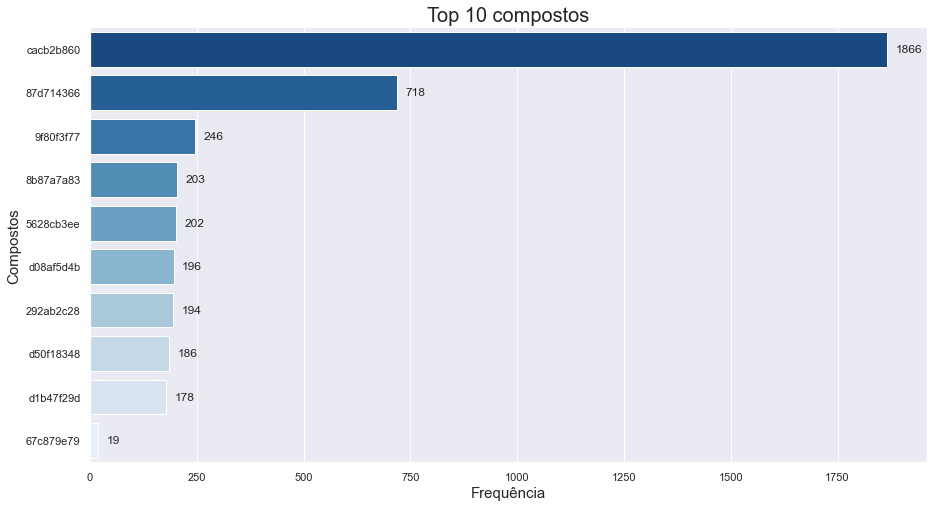

In [30]:
ax3 = sns.countplot(y = 'composto', data=compostos, order=compostos['composto'].value_counts().index, palette='Blues_r')
ax3.set_title('Top 10 compostos', fontsize=20)
ax3.set_xlabel('Frequência', fontsize=15)
ax3.set_ylabel('Compostos', fontsize=15)

for p in ax3.patches:
    width = p.get_width()    
    ax3.text(width + 20,       
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width), 
            ha = 'left',   
            va = 'center', fontsize=12)

plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'cacb2b860'),
  Text(1, 0, '87d714366'),
  Text(2, 0, '9f80f3f77'),
  Text(3, 0, '8b87a7a83'),
  Text(4, 0, '5628cb3ee'),
  Text(5, 0, 'd08af5d4b'),
  Text(6, 0, '292ab2c28'),
  Text(7, 0, 'd50f18348'),
  Text(8, 0, 'd1b47f29d'),
  Text(9, 0, '67c879e79')])

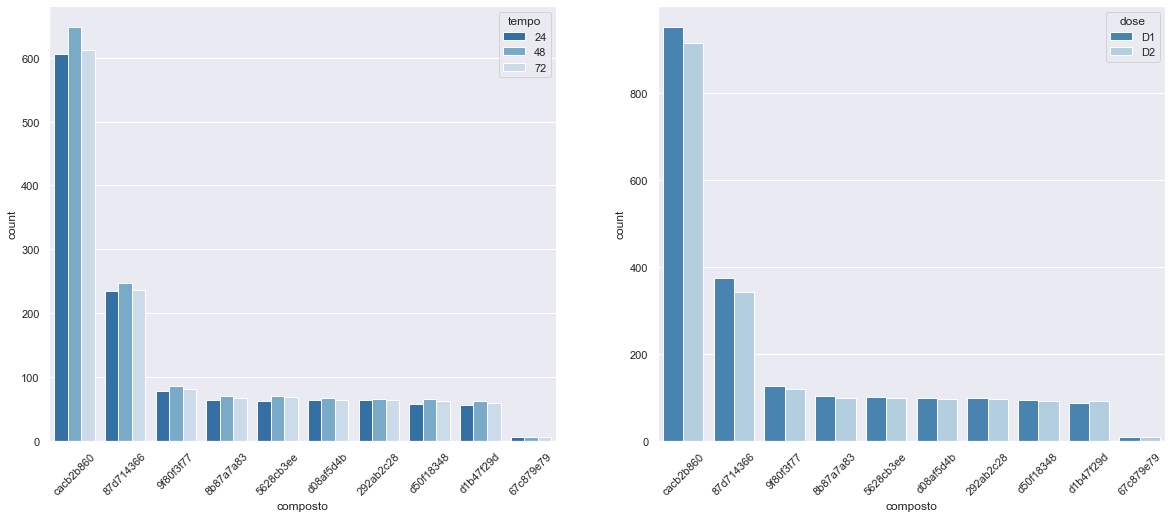

In [41]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x='composto', data=compostos, hue='tempo', order=compostos['composto'].value_counts().index, palette='Blues_r')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(x='composto', data=compostos, hue='dose', order=compostos['composto'].value_counts().index, palette='Blues_r')
plt.xticks(rotation=45)

É possível observar que, o tempo ```48``` se sobressai em relação ao top 10 compostos e D1 foi aplicada mais vezes que D2.

## 3.2. Análise variáveis contínuas

Vamos dar uma olhada na coluna ```g0```.
<br>
As colunas ```g``` é classificada como o os efeitos que foi causada de acordo com cada droga aplicada, no caso essa coluna é referente a cada gene.

In [106]:
df_ex['g0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

<p>É bem comum no meio científico a realização da normalização dos dados, para que não haja uma discrepância na distribuição desses valores, basicamente colocando os valores em uma mesma escala, em que o meio dessa distribuição seja 0.</p>

Vamos verificar os valores minimos e máximos de atráves de um histograma de todos as expressões gênicas.

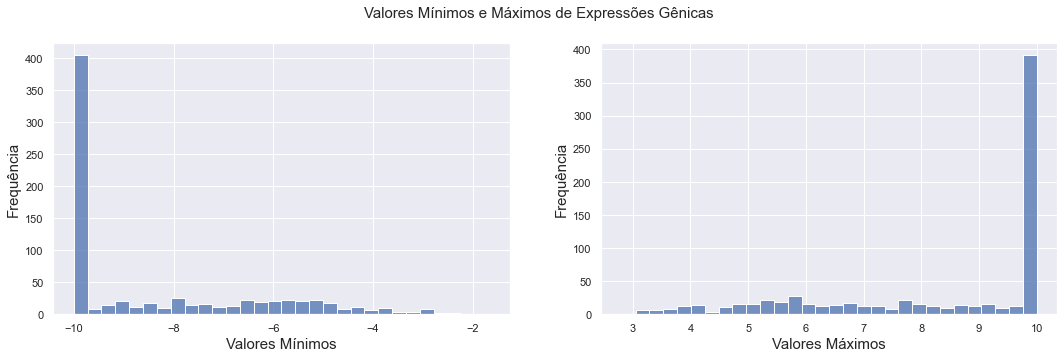

In [122]:
fig, ax = plt.subplots(1,2,figsize = (18,5))

sns.histplot(x = 'min', data = df_ex.loc[:,'g0':'g771'].describe().T, bins = 30, ax=ax[0])
sns.histplot(x = 'max', data = df_ex.loc[:,'g0':'g771'].describe().T, bins = 30, ax=ax[1])
ax[0].set_xlabel('Valores Mínimos', fontsize=15)
ax[0].set_ylabel('Frequência', fontsize=15)
ax[1].set_xlabel('Valores Máximos', fontsize=15)
ax[1].set_ylabel('Frequência', fontsize=15)
fig.suptitle('Valores Mínimos e Máximos de Expressões Gênicas', fontsize=15)
plt.show()

Vamos dar uma olhada na coluna ```g0``` que é uma coluna relacionada a um gene.

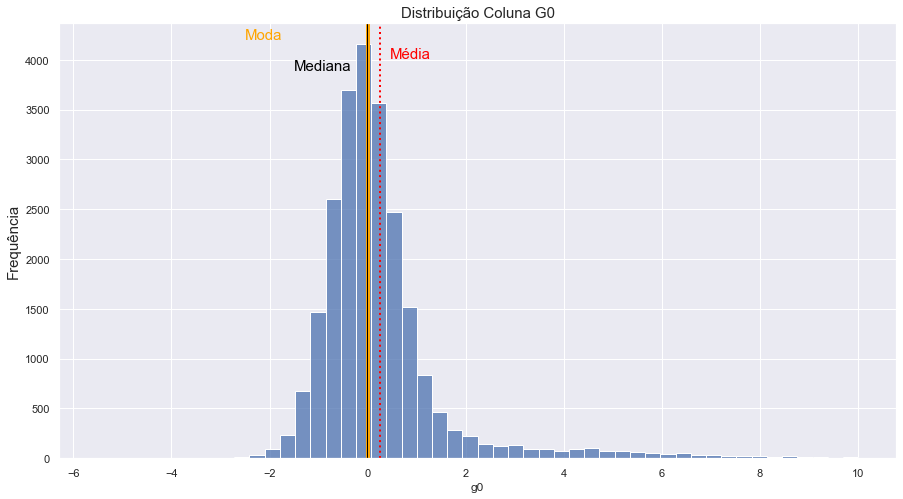

In [107]:
ax2 = sns.histplot(x='g0', data=df_ex, bins=50)
ax2.set_title('Distribuição Coluna G0', fontsize=15)
ax2.set_ylabel('Frequência', fontsize=15)
plt.axvline(x=df_ex['g0'].mean(), linestyle=':', linewidth=2, color='red')
ax2.text(x=df_ex['g0'].mean()+0.2, y=4020, s='Média', fontsize=15, color='red')
plt.axvline(x=df_ex['g0'].mode()[0], linestyle='-', linewidth=4, color='orange')
ax2.text(x=df_ex['g0'].mode()[0]-2.5, y=4205, s='Moda', fontsize=15, color='orange')
plt.axvline(x=df_ex['g0'].median(), linestyle='-', linewidth=1, color='black')
ax2.text(x=df_ex['g0'].median()-1.5, y=3900, s='Mediana', fontsize=15, color='black')
plt.show()

Como podemos observar, a coluna ```g0``` tem uma distribuição normal, onde o valor central, que é a mediana esta proximo de 0.

Conforme a análise que haviamos realizada anteriormente, temos um total 877 colunas, relacionadas a genes e células. Não é viável plotarmos um gráfico para cada atributo, porque isso demandaria muito tempo, e seria completamente desnecessário fazermos isso.
Por isso, vamos dar uma olhada na frequência media em relação a todos os genes disponíveis em nosso dataset. <br>
Para isso, vamos utilizar a função ```.describe()``` juntamente com a função ```.T['mean']``` que transforma linhas em colunas e individualizamos somente a coluna ```mean```que contem a média de todos os genes.

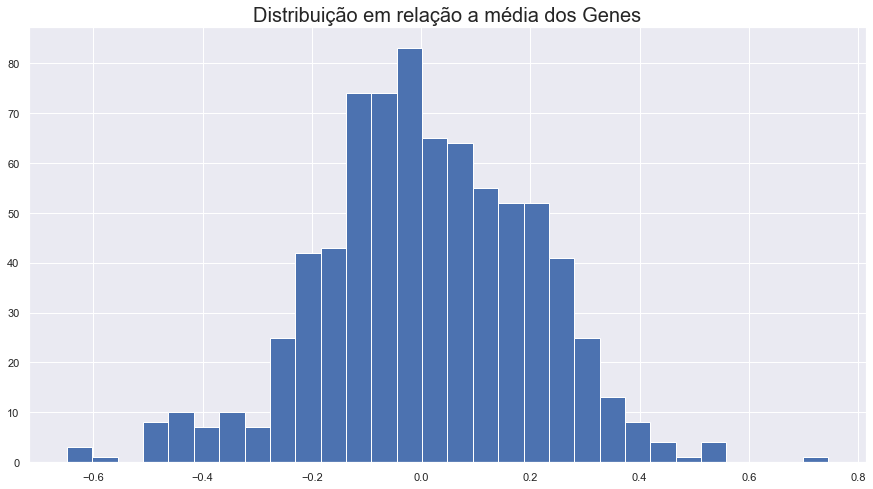

In [147]:
ax3 = df_ex.loc[:,'g0':'g771'].describe().T['mean'].hist(bins=30)
ax3.set_title('Distribuição em relação a média dos Genes', fontsize=20)
plt.show()

Na análise acima, fizemos uma análise da linha de tendencia dos genes g0 e g8, podemos observar que as variáveis ```com_controle``` não tem tendencia a ser alterado com o tempo, e é isso que se espera de uma variável de controle, agora a variável ```com_droga``` podemos observar que com o passar do tempo, as medições realizadas em 24, 48 e 72 horas foram alterando conforme a alteração do tempo, e é isso que devemos observar, com a droga, o efeito que o mesmo causa.

Conforme análisado anteriormente, tempos 5 compostos mais utilizados em nosso dataset, sendo a variável ```cacb2b860```

### 3.3.1. Análises Cruzadas

Com as análises realizadas até o momento, podemos realizar algumas perguntas ao nosso detaset.

#### Questão 1: Por que o atributo 'tratamento' tem os dos tão desbalanceados, de acordo com o que visualizamos no tópico 3.2.1, temos 98% do dataset com a variável 'com_droga' e 8% com a variável 'com_controle'.

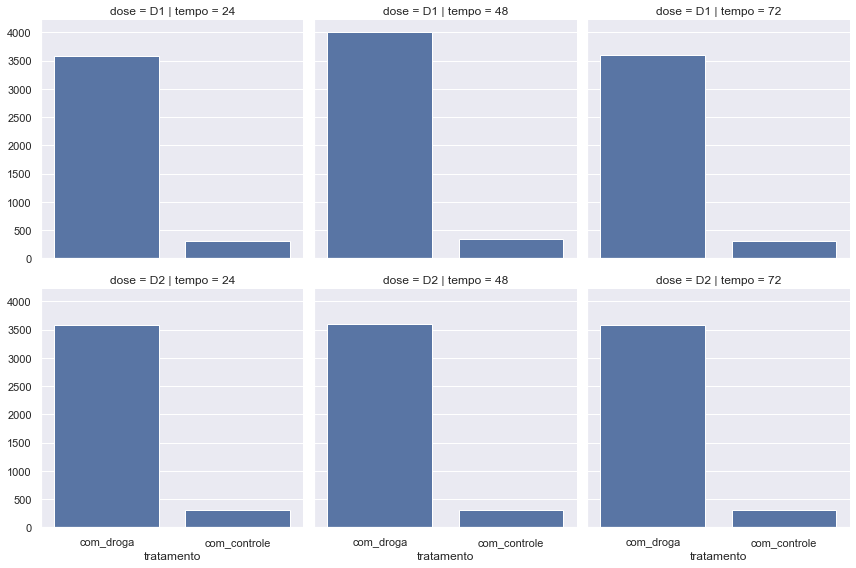

In [85]:
ax4 = sns.FacetGrid(df_ex, row='dose', col='tempo', height=4)
ax4 = ax4.map(sns.countplot, 'tratamento')

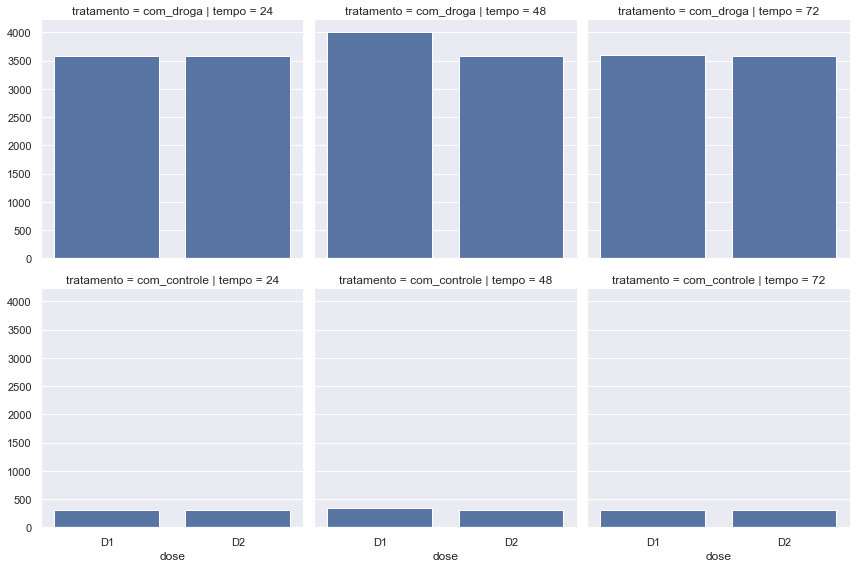

In [86]:
ax5 = sns.FacetGrid(df_ex, row='tratamento', col='tempo', height=4)
ax5 = ax5.map(sns.countplot, 'dose')

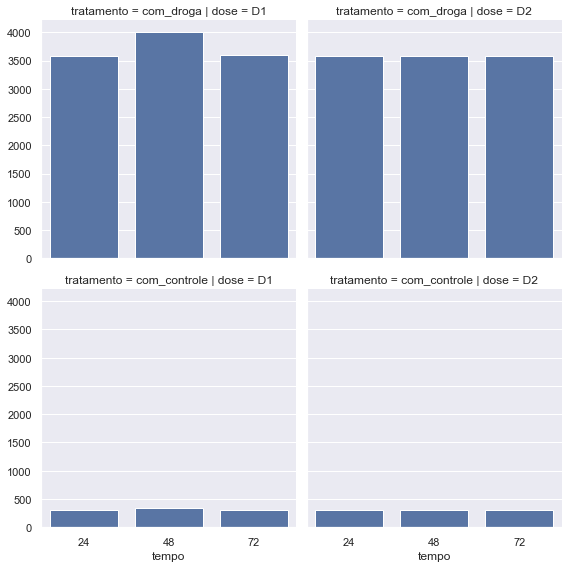

In [87]:
ax6 = sns.FacetGrid(df_ex, row='tratamento', col='dose', height=4)
ax6 = ax6.map(sns.countplot, 'tempo')

Conforme visto anteriormente, podemos afirmar que a variável do grupo de controle, contém um número de amostras pequeno, pois sómente um composto está sendo utilizando o grupo de controle.

Na função abaixo, vamos estar puxando a frequência de ocorrência das variáveis presentes nesse atributo tratamento.

In [88]:
df_ex['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

Como já observado anteriormente, temos 21.948 dados com a variável ```com_droga``` e 1.866 ```com_controle```.<br>
Vamos agora exibir os compostos mais utilizados nesse dataset com a função ```.value_counts()```.

In [89]:
df_ex['composto'].value_counts().sort_values(ascending=False).head()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
Name: composto, dtype: int64

Na célula acima, puxamos o top 5 compostos mais utilizados em nosso dataset, conforme podemos observar, a variável ```cacb2b860``` teve uma frequência de ocorrência de 1.866, esse valor bate com os 1.866 presentes com a variável ```com_controle``` no atributo ```tratamento```, vamos fazer mais algumas verificações para confirmar esse valor.<br>
Abaixo, vamos estar puxando a quantidade de linhas que

In [90]:
check_composto = df_ex['composto'].value_counts().index[0:5]
check_compostos = df_ex.query('composto in @check_composto')
check_compostos['composto'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
Name: composto, dtype: int64

In [91]:
pd.crosstab(index=[check_compostos['composto']], columns=check_compostos['tratamento']).sort_values(ascending=False, by='com_controle')

tratamento,com_controle,com_droga
composto,,
cacb2b860,1866,0
5628cb3ee,0,202
87d714366,0,718
8b87a7a83,0,203
9f80f3f77,0,246


Agora sim, podemos confirmar que os 1866 dados que  estão atribuidos a variável ```com_controle``` do atributo ```tratamento``` está relacionado ao composto ```cacb2b860```, sómente esse composto foi utilizado grupo de controle.

#### Questão 2: Quantos tipos de drogas foram investigados?

Para verificar a quantidade de drogas utilizadas nesse dataset, podemos usar a função ```.unique()``` que nesse caso puxa os valores unicos de acordo com uma coluna selecionada, juntamente com a função ```len()``` que faz a leitura do tamanho de uma lista definida.

In [92]:
df_ex['composto'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

Conforme podemos visualizar acima, utilizando a função ```.unique()``` conseguimos visualizar os valores unicos que constam nessa coluna. Agora utilizar com a ```.unique()``` a função ```len()``` que conforme explicado anteriormente, ela faz a leitura do tamanho da lista que queremos análisar.

In [93]:
len(df_ex['composto'].unique())

3289

Pronto, podemos concluímos que, nesse dataset foi utilizado ```3289``` tipos de composto.

### 3.3.2. Análise Tendências

Com a biblioteca ```Seaborn```, vamos plotar o gráfico lmplot para analisar o comportamento e verificar as tendências, vamos pegar pegar gene aleatório, ```g0``` e ```g8```.

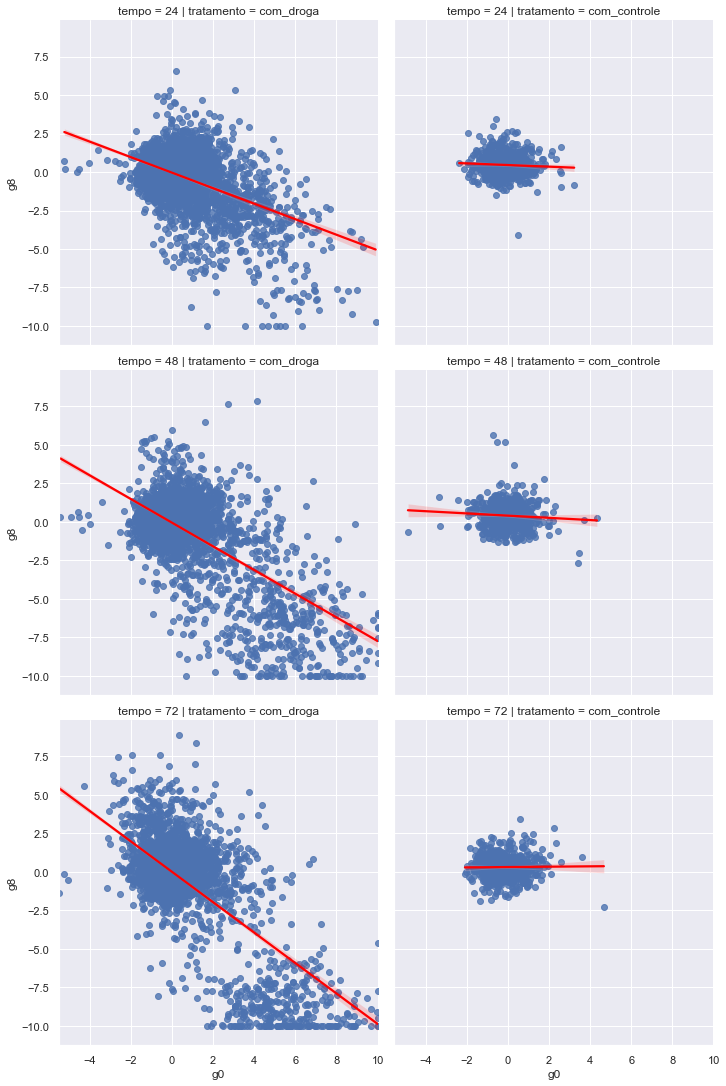

In [150]:
sns.lmplot(data=df_ex, x='g0', y='g8', line_kws={'color': 'red'}, col='tratamento', row='tempo')

Conforme observado, as variáveis com com_controle não são tendênciosos, e o correto a se esperar, agora os genes que foram aplicado compostos, houve alterações.

Por fim, vamos visualizar a correlação entre os atributos genes ```g``` com os atributos células ```c```.
Com dataset grandes, é muito trabalho entender os dados um a um, então com o auxílio da biblioteca ```seaborn``` plotaremos o gráfico heatmap.

In [43]:
corr = df_ex.loc[:, 'g0':'g50'].corr()

<AxesSubplot:>

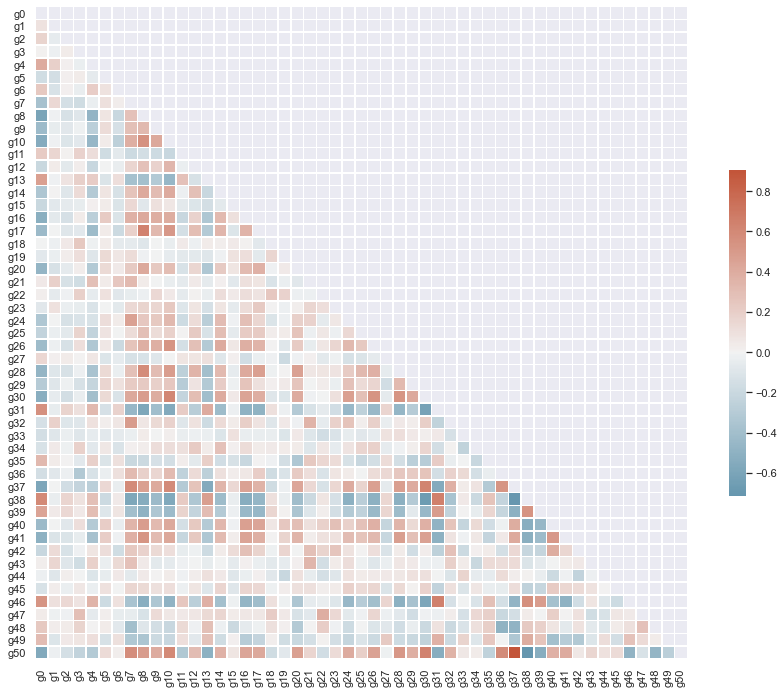

In [44]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [46]:
corr_celular = df_ex.loc[:,'c0':'c50'].corr()

<AxesSubplot:>

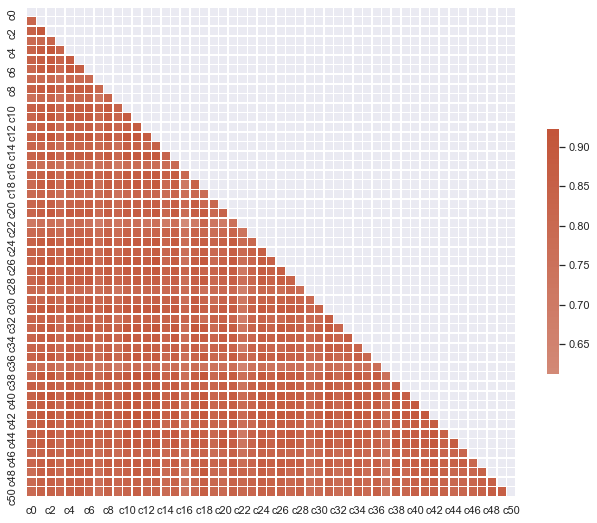

In [47]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

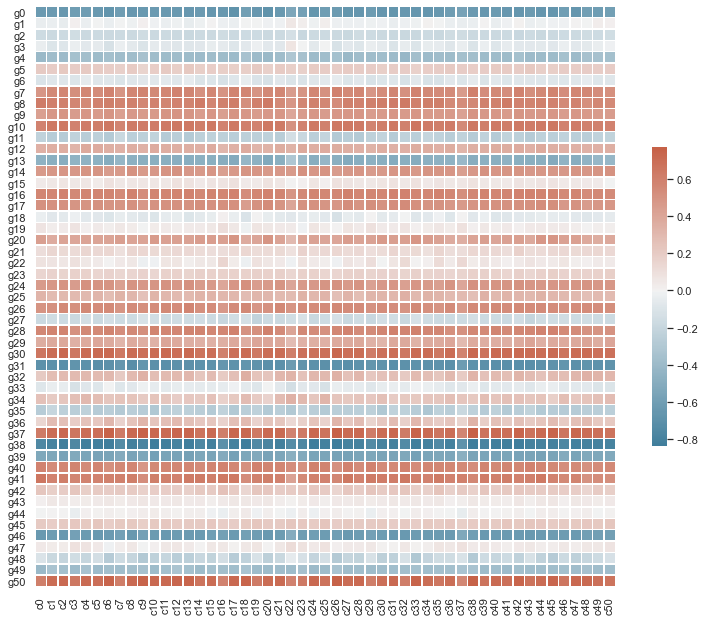

In [53]:
# Separando do dataframe original as colunas "g*" e "c*" e fazendo a correlação
corr = df_ex.loc[:, 'g0': 'c99'].corr()

# Reduzindo a tabela para mostrar os g* nas linhas e os c* nas colunas
corr_celular_genes = corr.loc['g0': 'g50', 'c0': 'c50']

# Definir tamanho do gráfico
f, ax = plt.subplots(figsize=(13, 11))

# Definir cores do gráfico
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Gerar o gráfico com o "heatmap"
sns.heatmap(corr_celular_genes, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5})

plt.show()

# 3. Modelo Machine Learning

In [77]:
Image(url= "https://scikit-learn.org/stable/_static/ml_map.png")

# Teste Acurácia

# Conclusão

Nessa primeira aula, que utilizamos um dataset complicado de uma area bem específica, foi possivel entender melhor de como os dados funcionam e sua estrutura, com poucas linhas de código e pouco entendimento de negócio.

- Podemos observar que estamos trabalhando com um dataset que é formado por 23.814 linhas e 877 coluna.
- Foram utilizados 3289 tipos de drogas nesse dataset.
- Tivemos dados desbalançeados na coluna ```tratamento```, onde é possível observar que em um dataset com 23.814 registros, somente 1.866 desses registros foram utilizadas o tratamento ```com_controle``` que equivale a aproximadamente 8% do dataset, e o restante 21.948 foram utilizadas o tratamento ```com_droga``` que é equivalente a 92% do dataset.
- E de forma pessoal, foi possivel aprender a utilizar o método ```.query``` do pandas, um método de filtragem na qual nunca havia utilizado antes, e com certeza, irei utilizar daqui para frente.




# Contato

<br>**Autor:** Augusto Franco Pereira Matos
<br>**E-mail:** augusto.fp.matos@gmail.com
<br>**Linkedin:** https://www.linkedin.com/in/augustomatos/
<br>**GitHub:** https://github.com/augusto-matos

# Referências

[1]. <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>Documentação Regressão Logística</a>

[2]. <a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest#sklearn.ensemble.RandomForestClassifier'> Documentação Random Forest Classifier</a>

[3]. <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html'>Documentaçao Train Test Split</a>

[4]. <a href='https://docs.google.com/document/d/10EhrQBChlyYIcff3to7PrCQi5HcNk2r-zd2ZCKPtcz8/edit'>Drug Discovery - Passado, Presente e Futuro</a>

[5]. <a href='https://drive.google.com/file/d/1VNP08ffCiGD8cqaBkdHATWSX8Yxfm3dj/view'>Expressão gênica: o caminho da informação biológica</a>

[6]. <a href='https://pt.wikipedia.org/wiki/Grupo_de_controle#:~:text=Um%20grupo%20de%20controle%20cient%C3%ADfico,dois%20experimentos%20id%C3%AAnticos%20s%C3%A3o%20conduzidos.'>Grupo de Controle</a>

[7]. <a href='https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html'>Dummy Classifier</a>

[8]. <a href='https://medium.com/machine-learning-beyond-deep-learning/%C3%A1rvores-de-decis%C3%A3o-3f52f6420b69'>Árvore de Decisão</a>

[9]. <a href='https://pt.wikipedia.org/wiki/Sobreajuste'>Overfitting</a>

[10]. <a href='https://scikit-learn.org/stable/'>Scikit-Learn</a>

[11]. <a href='https://en.wikipedia.org/wiki/Box_plot'>Box Plot</a>

[12]. <a href='https://www.alura.com.br/artigos/o-que-e-um-histograma?utm_source=gnarus&utm_medium=timeline'>O que é um Histograma?</a>